# Understanding Descriptive Statistics

Import the necessary libraries here:

In [285]:
# Libraries

import pandas as pd
import random
import matplotlib.pyplot as plt
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [80]:
# your code here
# new list to store the dice rolls

min_value = 1
max_value = 6


dice_rolls =[random.randint(min_value,max_value) for i in range(1,11)]

# dataframe from the list
df_dice = pd.DataFrame(dice_rolls,columns = ['dice rolls'])

# add the column with the throw numbers
throw = [i for i in range(1,11)]
throw
df_dice['Throw nr.'] = throw
df_dice

,dice rolls,Throw nr.
0,5,1
1,6,2
2,4,3
3,2,4
4,3,5
5,5,6
6,6,7
7,3,8
8,5,9
9,5,10


#### 2.- Plot the results sorted by value.

In [64]:
lst = [df_dice.index]
lst

[RangeIndex(start=0, stop=10, step=1)]

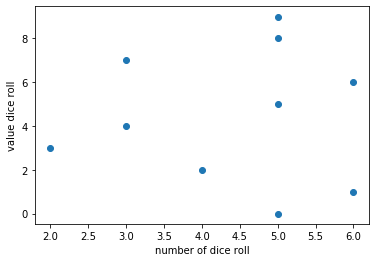

In [83]:
# your code here


df_dice = df_dice.sort_values(by='dice rolls', ascending = True)

plt.scatter(x=df_dice['dice rolls'], y=df_dice.index)

plt.xlabel("number of dice roll")
plt.ylabel("value dice roll")

plt.show()

In [158]:
df_dice.index

Int64Index([3, 4, 7, 2, 0, 5, 8, 9, 1, 6], dtype='int64')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

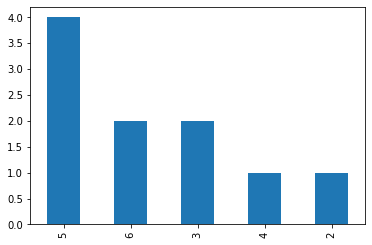

In [136]:
# your code here

y1 = df_dice['dice rolls'].value_counts()
y1.dtype

# histogram
df_dice['dice rolls'].value_counts().plot.bar()


plt.show()


In [ ]:
"""
your comments here

The frequency distribution tells how frequency of occurences is distributed over the possible values of the dice toss.

The histogram is much more intuitive and easy to read compared to the plot of the unique values of the dice.
The frequency distribution should be the same over all the 6 possible tosses and equal to the total number of dice tosses divided by 6

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [96]:
# your code here

mean_calculated = df_dice['dice rolls'].sum()/len(df_dice)
mean_calculated

4.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [183]:
# your code here

# create the dataframe with the value counts
y1 = df_dice['dice rolls'].value_counts()

# creating the list with the number of throws and the values from the dataframe y1
thr = list(y1.values)
val = list(y1.index)

# creating the list with the calculation of the frequency distribution
freq_distr = [i*j for i,j in zip(thr,val) ]

# calculating the mean value
sum(freq_distr/sum(thr))



4.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [199]:
y1

5    4
6    2
3    2
4    1
2    1
Name: dice rolls, dtype: int64

In [300]:
# your code here
# the median is the middle number in an odd list of elements, and the average of the two middle elements in an even list of elements

def median(y1):

# defining the slicing operators
    a = int(len(y1)/2)
    b = int((len(y1)-1)/2)

# defining the lists to work on
    thr = list(y1.values)
    val = list(y1.index)

# defining the condition to return the median 
    if len(y1)%2==0:
        median = (thr[math.floor(a)]+thr[math.ceil(a)])/2
    else:
        median = thr[b]
    return median

In [301]:
median(y1)

32.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [293]:
# your code here

def quartiles(y1):

# defining the slicing operators
    q1 = int(len(y1)/4)
    q1_odd = int((len(y1)-1)/4)
    
# defining the lists to work on
    thr = list(y1.values)
    val = list(y1.index)

# defining the condition to return the lower quartile 
    if len(y1)%2==0:
        upper_quartile = (thr[math.floor(q1)]+thr[math.ceil(q1)])/2
        lower_quartile = (thr[3*math.floor(q1)]+thr[(3*math.floor(q1))])/2
    else:
        upper_quartile = thr[q1_odd]
        lower_quartile = thr[3*q1_odd]
    return (lower_quartile,upper_quartile)

In [294]:
quartiles(y1)

(30.0, 39.0)

In [287]:
math.floor(3/2)

1

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

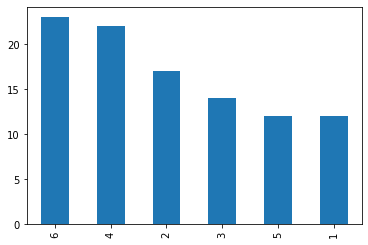

In [142]:
# your code here
roll_the_dice = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week5/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv'
                    )
roll_the_dice['value'].value_counts().plot.bar()
plt.show()

In [212]:
roll_the_dice

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [141]:
print(roll_the_dice['value'].value_counts())

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64


In [ ]:
"""
your comments here

the number of occurences of the 6 possible values are comprised between 12 and 23 occurences
Intuitively I would have expected a similar point mass function for the 6 different throws
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [213]:
# your code here


mean_calculated = roll_the_dice['value'].sum()/len(roll_the_dice)
mean_calculated

3.74

#### 3.- Now, calculate the frequency distribution.


In [214]:
# your code here

# create the dataframe with the value counts
y1 = roll_the_dice['value'].value_counts()

# creating the list with the number of throws and the values from the dataframe y1
thr = list(y1.values)
val = list(y1.index)

# creating the list with the calculation of the frequency distribution
freq_distr = [i*j for i,j in zip(thr,val)]
freq_distr

[138, 88, 34, 42, 60, 12]

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

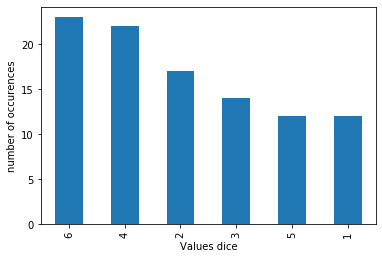

In [226]:
# your code here

#plt.hist(freq_distr,density=1) 
#plot.axis([50, 110, 0, 0.06]) 
#axis([xmin,xmax,ymin,ymax])
freq_val = pd.DataFrame(freq_distr)
freq_val['values dice'] = val

# histogram
roll_the_dice['value'].value_counts().plot.bar()
plt.xlabel('Values dice')
plt.ylabel('number of occurences')

plt.show()



In [229]:
freq_val


,0,values dice
0,138,6
1,88,4
2,34,2
3,42,3
4,60,5
5,12,1


In [ ]:
"""
your comments here

##---------How can you connect the mean value to the histogram?-----------##
#The mean value is equal to the sumproduct of the values of the throws by the number of throws divided by the total amount of throws



"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

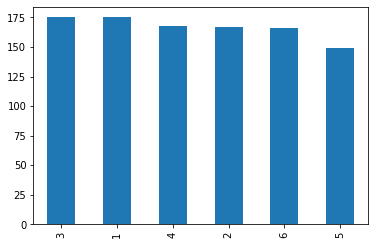

In [231]:
# your code here

roll_the_thousand = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week5/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv'
                    )
roll_the_thousand['value'].value_counts().plot.bar()
plt.show()

In [ ]:
"""
your comments here

The distribution of the number of throws per value of the dice is almost the same over the whole range.
This is conform to the idea that the more we repeat the experience of throwing the dice the closer who will come to the probabilistic calculation of dice throws.
In other words we approach for each value, the probability of occurence of each event as equal to 1/6
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [250]:
# your code here

address = '/Users/pietervierstraete/Desktop/Ironhack/week5/lab-understanding-descriptive-stats/data/ages_population'
population = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week5/lab-understanding-descriptive-stats/data/ages_population.csv')
population2 = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week5/lab-understanding-descriptive-stats/data/ages_population2.csv')
population3 = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week5/lab-understanding-descriptive-stats/data/ages_population3.csv')
                    
population.head()
population2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [247]:
population.shape

(1000, 1)

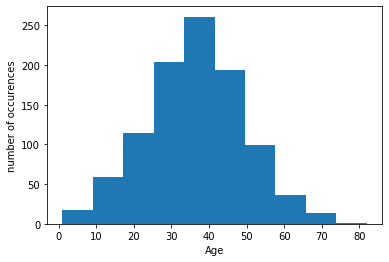

In [252]:

plt.hist(population['observation'])
plt.xlabel('Age')
plt.ylabel('number of occurences')
plt.show()

# from the plotted frequency distribution the mean should be around 38y old and the standard deviation should be equal to 13y more or less

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [255]:
# your code here
# mean
print(population.mean())

# standard deviation
print(population.std())



observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
your comments here

# my guess was not too far from the actual values

"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

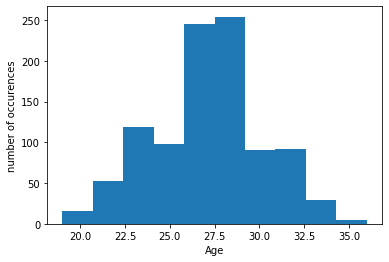

In [256]:
# your code here

plt.hist(population2['observation'])
plt.xlabel('Age')
plt.ylabel('number of occurences')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

The freuency distribution hhistogram is quite differen. There is a high concentration of ages between 25 and 30y old.
This neighbourhood seems to have a younger population profile

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [258]:
# your code here

# mean
print(population2.mean())

# standard deviation
print(population2.std())



observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
your comments here

The mean age is lower than for the dataset population.
The standard deviation is only 2.97y, this translates in the fact that the population pyramid is much more concentrated around the average

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

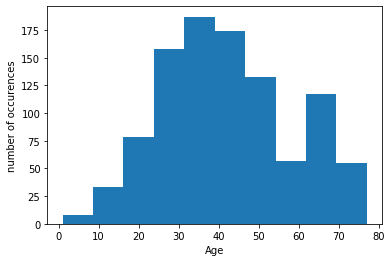

In [259]:
# your code here

plt.hist(population3['observation'])
plt.xlabel('Age')
plt.ylabel('number of occurences')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [299]:
# your code here

# mean
print(population3.mean())

# standard deviation
print(population3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
your comments here

The mean of the population is equal to 41.9 years
The standard deviation is 16.1 years.

The standard deviation is much higher than for population 2 because the peak between 60 and 70 years old (which is at 20y from the mean) needs to be accounted for in the standard deviation and increases its value
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [302]:
# your code here

# the following code gives the 25% and 75% quartile
population3_list = population3['observation']
population3_list

print(quartiles(population3_list))

# the following code gives the 50% median value
median(population3_list)


(30.0, 39.0)


32.0

In [ ]:
"""
your comments here

We have Q1 = 30, Q2 =32 and Q3 = 39  
The interquartile range Q2-Q1 thus contains 25% of the values within a 2 year range but the mean is equal to 41 because of the peak between 60 and 70 years
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

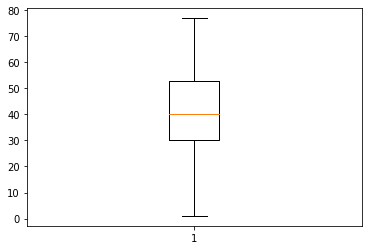

In [297]:
# your code here


#the boxplot helps giving a visual of the percentiles

plt.boxplot(population3_list) 
plt.show()

In [ ]:
"""
your comments here

50% of the values are concentrated between 30 and 39years old, but the higher values between 60 and 70y old have a big influence on the distribution
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""